In [1]:
import numpy
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests
from matplotlib import pyplot as plot
%matplotlib inline

In [2]:
with open("4.txt") as file:
    X = [float(line.split(' ')[0]) for line in file]
with open("4.txt") as file:
    Y = [float(line.split(' ')[1]) for line in file]

In [3]:
alpha = 0.05

In [4]:
# Проверяем, что выборка достаточно большая, чтобы можно было применять приближения коэффициентов кореляции.
print(len(X))

264


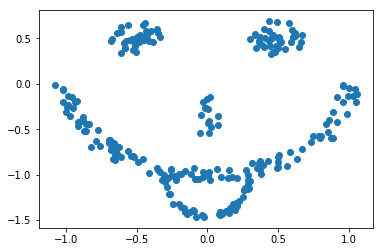

In [5]:
plot.scatter(X, Y)

С помощью коэффициентов корреляции проверить гипотезу о независимости для таких данных не получится.

In [6]:
p_values = [
    stats.pearsonr(X, Y)[1],
    stats.spearmanr(X, Y)[1],
    stats.kendalltau(X, Y)[1]
]

In [7]:
print(p_values)

[0.96233086083899855, 0.99312926484412667, 0.90064490660315821]


p-value говорят, что выборки не коррелируют. Но о независимости вывода сделать нельзя. Воспользуемся таблицами сопряженности.

In [8]:
m = 3
n = 3
epsilon = 0.1

In [9]:
# Делаем два разбиения вещественной оси
B = numpy.linspace(min(X) - epsilon, max(X) + epsilon, n + 1)
C = numpy.linspace(min(Y) - epsilon, max(Y) + epsilon, m + 1)

In [10]:
# Считаем таблицу сопряженности
nu = numpy.array([[
        len([1 for x, y in zip(X, Y) if ((B[i] <= x < B[i + 1]) and (C[j] <= y < C[j + 1]))])
        for j in range(m)
    ]
    for i in range(n)
])

In [11]:
print(nu)

[[10 39 36]
 [85 14 11]
 [10 26 33]]


In [12]:
N = numpy.sum(nu)
ns = numpy.array([sum(nu[i,:]) for i in range(n)])
ms = numpy.array([sum(nu[:,j]) for j in range(m)])

In [13]:
# Проверим условие применимости критерия хи-квадрат.
for x in ns:
    for y in ms:
        if x * y / N < 5:
            print("BAD")
        else:
            print("OK")

OK
OK
OK
OK
OK
OK
OK
OK
OK


In [14]:
# Критерий можно применять. Считаем статистику.
statistic = N * numpy.sum([[
        (nu[i][j] - (ns[i] * ms[j]) / N) ** 2 / (ns[i] * ms[j])
        for j in range(m)
    ]
    for i in range(n)
])

In [15]:
# p-value
print("statistic={}, p-value={}".format(statistic, stats.chi2.sf(statistic, df=(n-1)*(m-1))))

statistic=112.26481069698104, p-value=2.3927019856472146e-23


На уровне значимости $\alpha=0.05$ гипотезу о независимости можно отвергнуть. Т.е. выборки зависимы.